In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import random

# Load Data

In [ ]:
students_courses = pd.read_csv("students_courses.csv")
students_courses['RegNo'] = students_courses['RegNo'].astype(str)
students_courses.head()


,RegNo,courseCode,courseName,grade,remark,academic_year,semester,credits,year,subject,batch,Compulsory_for,Pre-requisites,Department,Combination,degree,Password
0,s181000,BL101,Basic Biology,B-,P,2019/2020,I,2,1,BL,18,"1,2,3,4,8,BL,MB,ZL,BMS,MIC",NoPrerequisites,Department of Zoology,1,NaN,57d379
1,s181000,BL102,Plant and Animal Form and Function,B,P,2019/2020,II,2,1,BL,18,"1,2,3,4,8,BL,ZL,BMS,MIC",NoPrerequisites,Department of Zoology,1,NaN,57d379
2,s181000,BL103,Basic Ecology,B,P,2019/2020,I,2,1,BL,18,"1,2,3,4,8,BL,ZL,BMS,MIC",NoPrerequisites,Department of Zoology,1,NaN,57d379
3,s181000,BL107,Basic Microbiology,B+,P,2019/2020,II,2,1,BL,18,"1,2,3,4,8,BL,ZL,BMS,MIC",NoPrerequisites,Department of Zoology,1,NaN,57d379
4,s181000,BL115,Biomolecules,B-,P,2019/2020,I,2,1,BL,18,"1,BL,ZL",NoPrerequisites,Department of Zoology,1,NaN,57d379


## Feature Extraction

In [ ]:
students_courses = students_courses[['RegNo', 'courseCode','semester', 'year','subject','batch','Pre-requisites' ,'Combination']]

In [ ]:
students_courses.shape

(52716, 8)

# Collaborative Filtering Technique

## Users feature vector

In [ ]:
# Pivot method for reshaping data around input features ('courseCode', 'year', 'combination')
# 1 for interaction, 0 for no interaction with the input features
studentID_Item_matrix = students_courses.pivot_table(
    index='RegNo',
    columns=['courseCode', 'Combination', 'year'],
    aggfunc=lambda x: 1 if len(x) > 0 else 0, fill_value=0
)
studentID_Item_matrix.head()

Pre-requisites                             ... subject           \
courseCode           AS400                             ...   ZL421    ZL424   
Combination              1 15 18 19  2 21 22 26 27 28  ...       1  8     1   
year                     4  4  4  4  4  4  4  4  4  4  ...       4  4     4   
RegNo                                                  ...                    
s161000                  0  0  0  0  0  0  0  0  0  0  ...       0  0     0   
s161001                  0  0  0  0  0  0  0  0  0  0  ...       0  0     0   
s161002                  0  0  0  0  0  0  0  0  0  0  ...       0  0     0   
s161003                  0  0  0  0  0  0  0  0  0  0  ...       0  0     0   
s161004                  0  0  0  0  0  0  0  0  0  0  ...       0  0     0   

                                           
courseCode     ZL425    ZL428    ZL491     
Combination  8     1  8     1  8     1  8  
year         4     4  4     4  4     4  4  
RegNo                                      
s161000      0     0  0     0  0     0  0  
s161001      0     0  0     0  0     0  0  
s161002      0     0  0     0  0     0  0  
s161003      0     0  0     0  0     0  0  
s161004      0     0  0     0  0     0  0  

[5 rows x 11576 columns]

In [ ]:
# Update illustration of the matrix, 1 to represent student have interacted, 0 to represent student havent interacted.
#studentID_Item_matrix = studentID_Item_matrix.applymap(lambda x: 1 if x > 0 else 0)
#studentID_Item_matrix.head()

## User to user similarity matrix by cosine similarity

In [ ]:
user_to_user_similarity_matrix = pd.DataFrame(
    cosine_similarity(studentID_Item_matrix)
)

user_to_user_similarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,966,967,968,969,970,971,972,973,974,975
0,1.000000,0.000000,0.000000,0.745241,0.732709,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1.000000,0.643325,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.643325,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.745241,0.000000,0.000000,1.000000,0.912664,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.732709,0.000000,0.000000,0.912664,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_to_user_similarity_matrix.columns = studentID_Item_matrix.index
user_to_user_similarity_matrix['RegNo'] = studentID_Item_matrix.index
user_to_user_similarity_matrix = user_to_user_similarity_matrix.set_index('RegNo')

user_to_user_similarity_matrix.head()

RegNo,s161000,s161001,s161002,s161003,s161004,s161005,s161006,s161007,s161008,s161009,...,s181497,s181498,s181499,s181500,s181501,s181502,s181503,s181504,s181505,s181506
RegNo,,,,,,,,,,,,,,,,,,,,,
s161000,1.000000,0.000000,0.000000,0.745241,0.732709,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s161001,0.000000,1.000000,0.643325,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s161002,0.000000,0.643325,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s161003,0.745241,0.000000,0.000000,1.000000,0.912664,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s161004,0.732709,0.000000,0.000000,0.912664,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Memory based collaborative filtering method

In [ ]:
def recommend(student_id, year, semester, students_data, user_to_user_similarity_matrix,num_similar_students=11):

    # Step 1: Identify similar students for a particular student
    similar_students = user_to_user_similarity_matrix.loc[student_id].sort_values(ascending=False)[1:num_similar_students + 1].index

    # Step 2: Get unique courses for the specific year and semester for similar students
    courses_for_year_semester = students_data[
        (students_data['RegNo'].isin(similar_students)) & (students_data['year'] == year) & (
                    students_data['semester'] == semester)]['courseCode'].unique()

    # Step 3: Check if the student has taken the prerequisite courses for the recommended courses
    student_courses = students_data[students_data['RegNo'] == student_id]['courseCode'].unique()
    recommended_courses = []

    for course in courses_for_year_semester:
        prerequisites = students_data.loc[students_data['courseCode'] == course, 'Pre-requisites'].iloc[0]
        if pd.isnull(prerequisites) or prerequisites == 'NoPrerequisites':
            recommended_courses.append(course)
        else:
            prerequisites = [p.strip() for p in prerequisites.split(',')]  # Split prerequisites into a list and remove leading/trailing whitespaces
            if all(p in student_courses for p in prerequisites):
                recommended_courses.append(course)

    return recommended_courses


### Check recommendations on sample data

In [ ]:
student_id = 's181000'
year = 3
semester = 'I'
num_similar_students=11


recommended_courses = recommend(student_id, year, semester,
                                students_courses, user_to_user_similarity_matrix,num_similar_students)

print("Recommended Courses:", recommended_courses)

def get_actual_courses(student_id, year, semester, students_data):
    # Filter the DataFrame based on the provided student registration number, year, and semester
    student_data_filtered = students_data[(students_data['RegNo'] == student_id) & (students_data['year'] == year) & (students_data['semester'] == semester)]

    # Extract unique course codes
    actual_courses = student_data_filtered['courseCode'].unique()

    return actual_courses

actual_courses_for_student = get_actual_courses(student_id, year,semester, students_courses)
print(f'Actual Courses: {actual_courses_for_student}')


Recommended Courses: ['CH321', 'CH331', 'CH341', 'CH328', 'CH348', 'MB331', 'ZL302', 'ZL314', 'ZL323', 'HR301', 'PH361', 'CH371', 'EN300', 'GL327', 'ZL328', 'ZL332', 'ZL331', 'SE301', 'SE302']
Actual Courses: ['CH331' 'CH321' 'CH348' 'CH328' 'CH371' 'EN300' 'ZL302' 'ZL323' 'ZL314'
 'ZL328']


# Split Data

In [ ]:
unique_reg_numbers = students_courses['RegNo'].unique()
train_reg_numbers, test_reg_numbers = train_test_split(unique_reg_numbers, test_size=0.25, random_state=50)
train_set = students_courses[students_courses['RegNo'].isin(train_reg_numbers)]
test_set = students_courses[students_courses['RegNo'].isin(test_reg_numbers)]

In [ ]:
print("Number of students in the train set : " , train_set['RegNo'].nunique())
print("Number of students in the test set : " , test_set['RegNo'].nunique())

Number of students in the train set :  732
Number of students in the test set :  244


In [ ]:
test_set.head()

,RegNo,courseCode,semester,year,subject,batch,Pre-requisites,Combination
106,s181002,BL101,I,1,BL,18,NoPrerequisites,1
107,s181002,BL102,II,1,BL,18,NoPrerequisites,1
108,s181002,BL103,I,1,BL,18,NoPrerequisites,1
109,s181002,BL107,II,1,BL,18,NoPrerequisites,1
110,s181002,BL115,I,1,BL,18,NoPrerequisites,1


# Model Testing

## Predict courses on test set

In [ ]:
# Initialize an empty list to store DataFrame chunks
dfs = []

# Iterate through each unique combination of RegNo, year, and semester
num_similar_students=5
for regno in test_set['RegNo'].unique():
    for year in test_set[test_set['RegNo'] == regno]['year'].unique():
        for semester in test_set[(test_set['RegNo'] == regno) & (test_set['year'] == year)]['semester'].unique():
            # Get the actual courses for the student for the specific year and semester
            actual_courses = get_actual_courses(regno, year, semester, test_set)

            # Get the predicted courses using the recommend function
            predicted_courses = recommend(regno, year, semester, test_set, user_to_user_similarity_matrix,num_similar_students)

            # Create a DataFrame chunk with the data
            df_chunk = pd.DataFrame({'RegNo': [regno],
                                     'year': [year],
                                     'semester': [semester],
                                     'actual_courses': [', '.join(actual_courses)],
                                     'predicted_courses': [', '.join(predicted_courses)]})

            # Append the DataFrame chunk to the list
            dfs.append(df_chunk)

# Concatenate all DataFrame chunks into one DataFrame
test_data = pd.concat(dfs, ignore_index=True)



# Shannon Entrophy

In [ ]:
from collections import Counter

def shannon_entropy(recommendations):
    # Step 1: Count the frequency of each course
    course_counts = Counter(recommendations)

    # Step 2: Calculate the probability of each course
    total_recommendations = len(recommendations)
    probabilities = [count / total_recommendations for count in course_counts.values()]

    # Step 3: Compute Shannon entropy
    entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])

    return entropy

# Concatenate all predicted courses into a single list
all_predicted_courses = ','.join(test_data['predicted_courses']).split(',')

# Calculate Shannon entropy for predicted courses
entropy = shannon_entropy(all_predicted_courses)
print("Shannon Entropy for Predicted Courses:", entropy)


Shannon Entropy for Predicted Courses: 8.186613096710726


In [ ]:
# Splitting the courses separated by commas and stacking them into a single column
courses = test_data['actual_courses'].str.split(', ').apply(pd.Series).stack()

# Counting the unique courseCodes
unique_course_count = courses.nunique()

print("Number of unique courseCode in actual_courses:", unique_course_count)


Number of unique courseCode in actual_courses: 527


# Model Evaluation

## I. Macro Average Precision, Recall and F1 score

In [ ]:
from collections import defaultdict

# Group DataFrame by 'RegNo', 'year', and 'semester'
grouped_df = test_data.groupby(['RegNo', 'year', 'semester'])

# Initialize a dictionary to store results
evaluation_dict = defaultdict(dict)

# Iterate over groups
for (regno, year, semester), group in grouped_df:
    # Initialize counters
    TP, FP, FN = 0, 0, 0

    # Iterate over rows in the group
    for _, row in group.iterrows():
        actual_courses = set(row['actual_courses'].split(', '))
        predicted_courses = set(row['predicted_courses'].split(', '))

        # Calculate True Positives
        TP += len(actual_courses.intersection(predicted_courses))
        # Calculate False Positives
        FP += len(predicted_courses.difference(actual_courses))
        # Calculate False Negatives
        FN += len(actual_courses.difference(predicted_courses))

    # Calculate precision, recall, and F1-score
    precision = TP / (TP + FP) if TP + FP > 0 else 0
    recall = TP / (TP + FN) if TP + FN > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0

    # Store results in dictionary
    evaluation_dict[(regno, year, semester)] = {'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Calculate macro average precision, recall, and F1-score
macro_avg_precision = sum(result['Precision'] for result in evaluation_dict.values()) / len(evaluation_dict)
macro_avg_recall = sum(result['Recall'] for result in evaluation_dict.values()) / len(evaluation_dict)
macro_avg_f1 = sum(result['F1-score'] for result in evaluation_dict.values()) / len(evaluation_dict)

# macro average results
print("Macro Average Precision:", round(macro_avg_precision, 3))
print("Macro Average Recall:", round(macro_avg_recall, 3))
print("Macro Average F1-score:", round(macro_avg_f1, 3))


Macro Average Precision: 0.77
Macro Average Recall: 0.772
Macro Average F1-score: 0.767


In [ ]:
from collections import defaultdict

def evaluate_recommendations(test_set, user_to_user_similarity_matrix, num_similar_students):
    dfs = []

    # Iterate through each unique combination of RegNo, year, and semester
    for regno in test_set['RegNo'].unique():
        for year in test_set[test_set['RegNo'] == regno]['year'].unique():
            for semester in test_set[(test_set['RegNo'] == regno) & (test_set['year'] == year)]['semester'].unique():
                # Get the actual courses for the student for the specific year and semester
                actual_courses = get_actual_courses(regno, year, semester, test_set)

                # Get the predicted courses using the recommend function
                predicted_courses = recommend(regno, year, semester, test_set, user_to_user_similarity_matrix,num_similar_students)

                # Create a DataFrame chunk with the data
                df_chunk = pd.DataFrame({'RegNo': [regno],
                                         'year': [year],
                                         'semester': [semester],
                                         'actual_courses': [', '.join(actual_courses)],
                                         'predicted_courses': [', '.join(predicted_courses)]})

                # Append the DataFrame chunk to the list
                dfs.append(df_chunk)

    # Concatenate all DataFrame chunks into one DataFrame
    test_data = pd.concat(dfs, ignore_index=True)

    # Group DataFrame by 'RegNo', 'year', and 'semester'
    grouped_df = test_data.groupby(['RegNo', 'year', 'semester'])

    # Initialize a dictionary to store results
    evaluation_dict = defaultdict(dict)

    # Iterate over groups
    for (regno, year, semester), group in grouped_df:
        # Initialize counters
        TP, FP, FN = 0, 0, 0

        # Iterate over rows in the group
        for _, row in group.iterrows():
            actual_courses = set(row['actual_courses'].split(', '))
            predicted_courses = set(row['predicted_courses'].split(', '))

            # Calculate True Positives
            TP += len(actual_courses.intersection(predicted_courses))
            # Calculate False Positives
            FP += len(predicted_courses.difference(actual_courses))
            # Calculate False Negatives
            FN += len(actual_courses.difference(predicted_courses))

        # Calculate precision, recall, and F1-score
        precision = TP / (TP + FP) if TP + FP > 0 else 0
        recall = TP / (TP + FN) if TP + FN > 0 else 0
        f1 = (2 * precision * recall) / (precision + recall) if precision + recall > 0 else 0

        # Store results in dictionary
        evaluation_dict[(regno, year, semester)] = {'Precision': precision, 'Recall': recall, 'F1-score': f1}

    # Calculate macro average precision, recall, and F1-score
    macro_avg_precision = sum(result['Precision'] for result in evaluation_dict.values()) / len(evaluation_dict)
    macro_avg_recall = sum(result['Recall'] for result in evaluation_dict.values()) / len(evaluation_dict)
    macro_avg_f1 = sum(result['F1-score'] for result in evaluation_dict.values()) / len(evaluation_dict)

    return macro_avg_precision, macro_avg_recall, macro_avg_f1


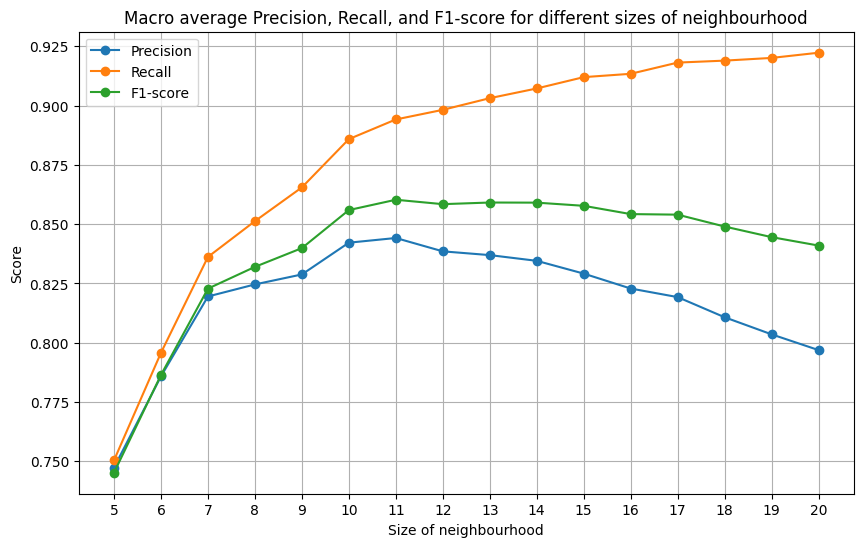

In [ ]:
# Range of num_similar_students values
num_similar_students_range = range(5, 21)

# Lists to store evaluation metrics
precisions = []
recalls = []
f1_scores = []

# Iterate over different values of num_similar_students
for num_similar_students in num_similar_students_range:
    # Compute evaluation metrics
    precision, recall, f1_score = evaluate_recommendations(test_set, user_to_user_similarity_matrix, num_similar_students)

    # Append the metrics to the respective lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

# Plotting
plt.figure(figsize=(10, 6))

# Plot Macro Average Precision
plt.plot(num_similar_students_range, precisions, label='Precision', marker='o')

# Plot Macro Average Recall
plt.plot(num_similar_students_range, recalls, label='Recall', marker='o')

# Plot Macro Average F1-score
plt.plot(num_similar_students_range, f1_scores, label='F1-score', marker='o')

plt.title('Macro average Precision, Recall, and F1-score for different sizes of neighbourhood')
plt.xlabel('Size of neighbourhood')
plt.ylabel('Score')
plt.xticks(num_similar_students_range)
plt.grid(True)
plt.legend()
plt.show()



## II. Micro Average Precision, Recall and F1 score

In [ ]:
# Initialize counters for micro-average
micro_TP, micro_FP, micro_FN = 0, 0, 0

# Iterate over evaluation results
for result in evaluation_dict.values():
    micro_TP += result['Precision'] * (result['Precision'] + result['Recall'])
    micro_FP += (1 - result['Precision']) * result['Recall']
    micro_FN += (1 - result['Recall']) * result['Precision']

# Calculate micro average precision, recall, and F1-score
micro_avg_precision = micro_TP / (micro_TP + micro_FP) if micro_TP + micro_FP > 0 else 0
micro_avg_recall = micro_TP / (micro_TP + micro_FN) if micro_TP + micro_FN > 0 else 0
micro_avg_f1 = (2 * micro_avg_precision * micro_avg_recall) / (micro_avg_precision + micro_avg_recall) if micro_avg_precision + micro_avg_recall > 0 else 0

# micro average results
print("Micro Average Precision:", round(micro_avg_precision, 3))
print("Micro Average Recall:", round(micro_avg_recall, 3))
print("Micro Average F1-score:", round(micro_avg_f1, 3))


Micro Average Precision: 0.967
Micro Average Recall: 0.968
Micro Average F1-score: 0.967


## Coverage

## I. Course Catalog Coverage

In [ ]:
# Step 1: Determine the total number of unique courses in the dataset
total_unique_courses = len(set(test_data['actual_courses'].str.split(', ').explode()))

# Step 2-3: Generate recommendations for each student and count unique recommended courses
recommended_courses = []

for regno in test_data['RegNo'].unique():
    for year in test_data[test_data['RegNo'] == regno]['year'].unique():
        for semester in test_data[(test_data['RegNo'] == regno) & (test_data['year'] == year)]['semester'].unique():
            recommended_courses.extend(recommend(regno, year, semester, test_set, user_to_user_similarity_matrix))

unique_recommended_courses = len(set(recommended_courses))

# Step 4: Calculate coverage
coverage = unique_recommended_courses / total_unique_courses * 100

print(f"Course Catalog Coverage: {coverage:.2f}%")


Course Catalog Coverage: 89.94%


## II. User Coverage (For each instance)

In [ ]:
# Step 1: Determine the total number of unique combinations of RegNo, year, and semester in the dataset
total_unique_combinations = len(test_data[['RegNo', 'year', 'semester']].drop_duplicates())

# Step 2: Initialize a set to store recommended combinations
recommended_combinations = set()

# Step 3: Generate recommendations for each unique combination of RegNo, year, and semester and add them to the set
for index, row in test_data.drop_duplicates(['RegNo', 'year', 'semester']).iterrows():
    recommendations = recommend(row['RegNo'], row['year'], row['semester'], test_set, user_to_user_similarity_matrix)
    if recommendations:
        recommended_combinations.add((row['RegNo'], row['year'], row['semester']))

# Step 4: Calculate coverage
combination_coverage = len(recommended_combinations) / total_unique_combinations * 100

print(f"Coverage based on unique RegNo, year, semester combinations: {combination_coverage:.2f}%")


Coverage based on unique RegNo, year, semester combinations: 96.56%


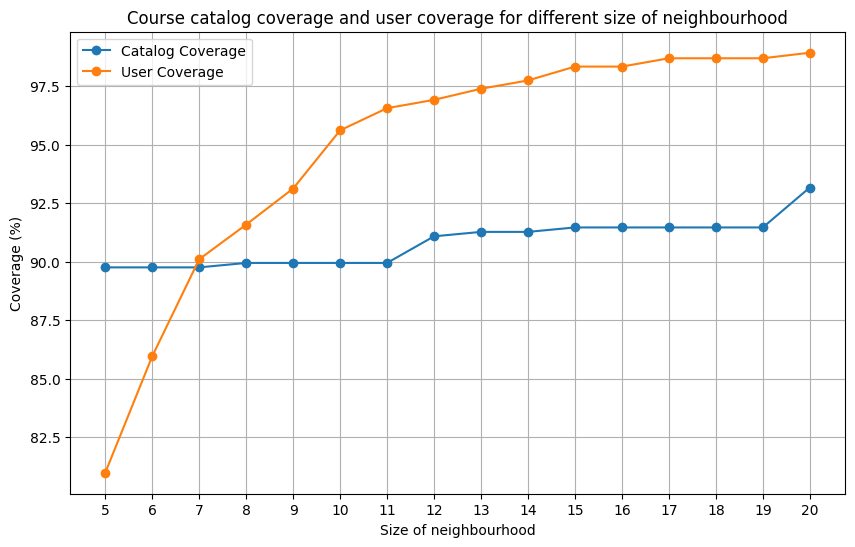

In [ ]:
# Lists to store coverage metrics
catalog_coverages = []
user_coverages = []

# Iterate over different values of num_similar_students
for num_similar_students in num_similar_students_range:
    # Compute Course Catalog Coverage
    total_unique_courses = len(set(test_data['actual_courses'].str.split(', ').explode()))
    recommended_courses = []
    for regno in test_data['RegNo'].unique():
        for year in test_data[test_data['RegNo'] == regno]['year'].unique():
            for semester in test_data[(test_data['RegNo'] == regno) & (test_data['year'] == year)]['semester'].unique():
                recommended_courses.extend(recommend(regno, year, semester, test_set, user_to_user_similarity_matrix, num_similar_students))
    unique_recommended_courses = len(set(recommended_courses))
    catalog_coverage = unique_recommended_courses / total_unique_courses * 100
    catalog_coverages.append(catalog_coverage)

    # Compute User Coverage
    total_unique_combinations = len(test_data[['RegNo', 'year', 'semester']].drop_duplicates())
    recommended_combinations = set()
    for index, row in test_data.drop_duplicates(['RegNo', 'year', 'semester']).iterrows():
        recommendations = recommend(row['RegNo'], row['year'], row['semester'], test_set, user_to_user_similarity_matrix, num_similar_students)
        if recommendations:
            recommended_combinations.add((row['RegNo'], row['year'], row['semester']))
    combination_coverage = len(recommended_combinations) / total_unique_combinations * 100
    user_coverages.append(combination_coverage)

# Plotting
plt.figure(figsize=(10, 6))

# Plot Catalog Coverage
plt.plot(num_similar_students_range, catalog_coverages, label='Catalog Coverage', marker='o')

# Plot User Coverage
plt.plot(num_similar_students_range, user_coverages, label='User Coverage', marker='o')

plt.title('Course catalog coverage and user coverage for different size of neighbourhood')
plt.xlabel('Size of neighbourhood')
plt.ylabel('Coverage (%)')
plt.xticks(num_similar_students_range)
plt.grid(True)
plt.legend()
plt.show()
